<a href="https://colab.research.google.com/github/pravin-raut/TimeSeries_USD-EUR_WithOilImpact/blob/Master/05_Currency_%26_Oil_Forecast_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading ARIMA Test Dataset

In [3]:
df_ARIMA_Test = pd.read_csv("/content/drive/MyDrive/dissertation/test_ARIMA.csv")
df_ARIMA_Test['Date'] = pd.to_datetime(df_ARIMA_Test['Date']).dt.date

df_ARIMA_Test.set_index('Date', inplace=True)
df_ARIMA_Test.head(5)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Predicted_EUR_USD_Price_t+1,Predicted_EUR_USD_Price_t+2,Predicted_EUR_USD_Price_t+3,Predicted_EUR_USD_Price_t+4,Predicted_EUR_USD_Price_t+5,Predicted_EUR_USD_Price_WithOil_t+1,Predicted_EUR_USD_Price_WithOil_t+2,Predicted_EUR_USD_Price_WithOil_t+3,Predicted_EUR_USD_Price_WithOil_t+4,Predicted_EUR_USD_Price_WithOil_t+5
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,82.05,0.545828,1.070973,-0.842166,1.066075,1.062925,1.063717,1.064022,81.29,80.39,...,1.067011,1.067619,1.068527,1.069031,1.068639,1.067015,1.067623,1.068530,1.069035,1.068644
2023-01-03,82.05,0.545828,1.067771,-0.897432,1.070973,1.066075,1.062925,1.063717,82.05,81.29,...,1.067783,1.068719,1.069256,1.068912,1.069141,1.067786,1.068720,1.069258,1.068913,1.069143
2023-01-04,76.88,0.311455,1.054685,-1.123295,1.067771,1.070973,1.066075,1.062925,82.05,82.05,...,1.065957,1.066035,1.065130,1.064564,1.066548,1.065964,1.066046,1.065145,1.064581,1.066566
2023-01-05,75.77,0.261135,1.060637,-1.020580,1.054685,1.067771,1.070973,1.066075,76.88,82.05,...,1.064914,1.063823,1.063030,1.064692,1.065499,1.064930,1.063845,1.063058,1.064724,1.065533
2023-01-06,76.15,0.278361,1.052222,-1.165818,1.060637,1.054685,1.067771,1.070973,75.77,76.88,...,1.061148,1.059910,1.061029,1.061066,1.062851,1.061172,1.059942,1.061068,1.061107,1.062898


# Reading SVR Test Dataset

In [4]:
df_SVR_Test = pd.read_csv("/content/drive/MyDrive/dissertation/test_SVR.csv")
df_SVR_Test['Date'] = pd.to_datetime(df_SVR_Test['Date']).dt.date

df_SVR_Test.set_index('Date', inplace=True)
df_SVR_Test.head(10)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Predicted_Oil_Price_t+1,Predicted_Oil_Price_t+2,Predicted_Oil_Price_t+3,Predicted_Oil_Price_t+4,Predicted_Oil_Price_t+5,Predicted_EUR_USD_Price_WithOil_t+1,Predicted_EUR_USD_Price_WithOil_t+2,Predicted_EUR_USD_Price_WithOil_t+3,Predicted_EUR_USD_Price_WithOil_t+4,Predicted_EUR_USD_Price_WithOil_t+5
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,82.05,0.545828,1.070973,-0.842166,1.066075,1.062925,1.063717,1.064022,81.29,80.39,...,82.237404,82.235648,82.195540,82.208148,82.253738,1.070753,1.070211,1.069859,1.069585,1.069155
2023-01-03,82.05,0.545828,1.067771,-0.897432,1.070973,1.066075,1.062925,1.063717,82.05,81.29,...,82.037300,82.003128,82.030894,82.082281,82.134820,1.067068,1.066748,1.066482,1.065955,1.065478
2023-01-04,76.88,0.311455,1.054685,-1.123295,1.067771,1.070973,1.066075,1.062925,82.05,82.05,...,76.545372,76.735538,77.199456,77.405026,77.430996,1.053616,1.053543,1.053264,1.052628,1.052216
2023-01-05,75.77,0.261135,1.060637,-1.020580,1.054685,1.067771,1.070973,1.066075,76.88,82.05,...,75.915031,76.402916,76.669611,76.717863,76.706101,1.061105,1.060835,1.060260,1.060108,1.059849
2023-01-06,76.15,0.278361,1.052222,-1.165818,1.060637,1.054685,1.067771,1.070973,75.77,76.88,...,76.651581,76.911046,76.940741,76.922198,76.925459,1.051268,1.050704,1.050494,1.049960,1.049562
2023-01-09,77.57,0.342735,1.065632,-0.934353,1.052222,1.060637,1.054685,1.067771,76.15,75.77,...,77.882949,77.884132,77.792740,77.769223,77.803363,1.066073,1.065818,1.065326,1.065390,1.065131
2023-01-10,77.00,0.316895,1.073318,-0.801692,1.065632,1.052222,1.060637,1.054685,77.57,76.15,...,76.949973,76.886160,76.932767,76.992576,77.037964,1.073629,1.073197,1.073338,1.073309,1.073100
2023-01-11,78.23,0.372655,1.073895,-0.791746,1.073318,1.065632,1.052222,1.060637,77.00,77.57,...,78.240378,78.247057,78.205264,78.213316,78.255169,1.073389,1.073501,1.073440,1.073193,1.072907
2023-01-12,80.73,0.485988,1.076600,-0.745050,1.073895,1.073318,1.065632,1.052222,78.23,77.00,...,80.881303,80.761581,80.570434,80.537773,80.593975,1.076847,1.076699,1.076352,1.076072,1.075736


# Reading MLP Test Dataset

In [5]:
df_MLP_Test = pd.read_csv("/content/drive/MyDrive/dissertation/test_MLP.csv")
df_MLP_Test['Date'] = pd.to_datetime(df_MLP_Test['Date']).dt.date

df_MLP_Test.set_index('Date', inplace=True)
df_MLP_Test.head(10)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Predicted_Oil_Price_t+1,Predicted_Oil_Price_t+2,Predicted_Oil_Price_t+3,Predicted_Oil_Price_t+4,Predicted_Oil_Price_t+5,Predicted_EUR_USD_Price_WithOil_t+1,Predicted_EUR_USD_Price_WithOil_t+2,Predicted_EUR_USD_Price_WithOil_t+3,Predicted_EUR_USD_Price_WithOil_t+4,Predicted_EUR_USD_Price_WithOil_t+5
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,82.05,0.545828,1.070973,-0.842166,1.066075,1.062925,1.063717,1.064022,81.29,80.39,...,81.516792,82.281582,81.744761,81.891193,81.939093,1.070930,1.071638,1.071111,1.071124,1.070980
2023-01-03,82.05,0.545828,1.067771,-0.897432,1.070973,1.066075,1.062925,1.063717,82.05,81.29,...,82.521023,82.203652,82.277692,82.251573,82.121760,1.068921,1.067771,1.068148,1.067941,1.068068
2023-01-04,76.88,0.311455,1.054685,-1.123295,1.067771,1.070973,1.066075,1.062925,82.05,82.05,...,79.670511,77.422897,78.162645,78.815911,77.709764,1.055599,1.053296,1.054844,1.054784,1.055327
2023-01-05,75.77,0.261135,1.060637,-1.020580,1.054685,1.067771,1.070973,1.066075,76.88,82.05,...,75.671346,74.805775,75.988603,75.423919,75.755632,1.057657,1.060248,1.059650,1.060332,1.060252
2023-01-06,76.15,0.278361,1.052222,-1.165818,1.060637,1.054685,1.067771,1.070973,75.77,76.88,...,75.020718,76.400545,75.770874,76.036142,76.231578,1.055577,1.053913,1.055228,1.055045,1.055462
2023-01-09,77.57,0.342735,1.065632,-0.934353,1.052222,1.060637,1.054685,1.067771,76.15,75.77,...,77.545317,77.964845,77.884003,77.725552,77.869439,1.062524,1.065755,1.064353,1.064919,1.064614
2023-01-10,77.00,0.316895,1.073318,-0.801692,1.065632,1.052222,1.060637,1.054685,77.57,76.15,...,77.719967,77.414690,77.330275,77.549863,77.248087,1.075028,1.075736,1.075040,1.074935,1.074789
2023-01-11,78.23,0.372655,1.073895,-0.791746,1.073318,1.065632,1.052222,1.060637,77.00,77.57,...,77.643724,77.769222,77.919563,77.546986,77.885022,1.074758,1.073833,1.073854,1.073682,1.073798
2023-01-12,80.73,0.485988,1.076600,-0.745050,1.073895,1.073318,1.065632,1.052222,78.23,77.00,...,79.155135,80.575684,79.784090,79.693694,80.131533,1.075386,1.075716,1.075284,1.075396,1.075340


# Reading ARIMA Summary Test Dataset for Price Band

In [6]:
df_ARIMA_Test_Summary = pd.read_csv("/content/drive/MyDrive/dissertation/Mertics_ARIMA.csv")



# Reading MLP Summary Test Dataset for Price Band

In [7]:
df_MLP_Test_Summary = pd.read_csv("/content/drive/MyDrive/dissertation/Mertics_MLP.csv")


# Reading SVR Summary Test Dataset for Price Band

In [8]:
df_SVR_Test_Summary = pd.read_csv("/content/drive/MyDrive/dissertation/Mertics_SVR.csv")



# Combine Summary Dataset for PriceBand

In [9]:
result=pd.concat([df_SVR_Test_Summary,df_MLP_Test_Summary,df_ARIMA_Test_Summary])
result = result[['Predicted Column','Steps Ahead','Mean Absolute Error','Model']].reset_index(drop=True)
result.head(5)

,Predicted Column,Steps Ahead,Mean Absolute Error,Model
0,Predicted_EUR_USD_Price_t+1,1,0.004399,SVR
1,Predicted_EUR_USD_Price_t+2,2,0.005586,SVR
2,Predicted_EUR_USD_Price_t+3,3,0.006544,SVR
3,Predicted_EUR_USD_Price_t+4,4,0.006945,SVR
4,Predicted_EUR_USD_Price_t+5,5,0.007784,SVR


#MAE by Model and Predicted Column for multiple steps ahead for EUR-USD Exchange Rate

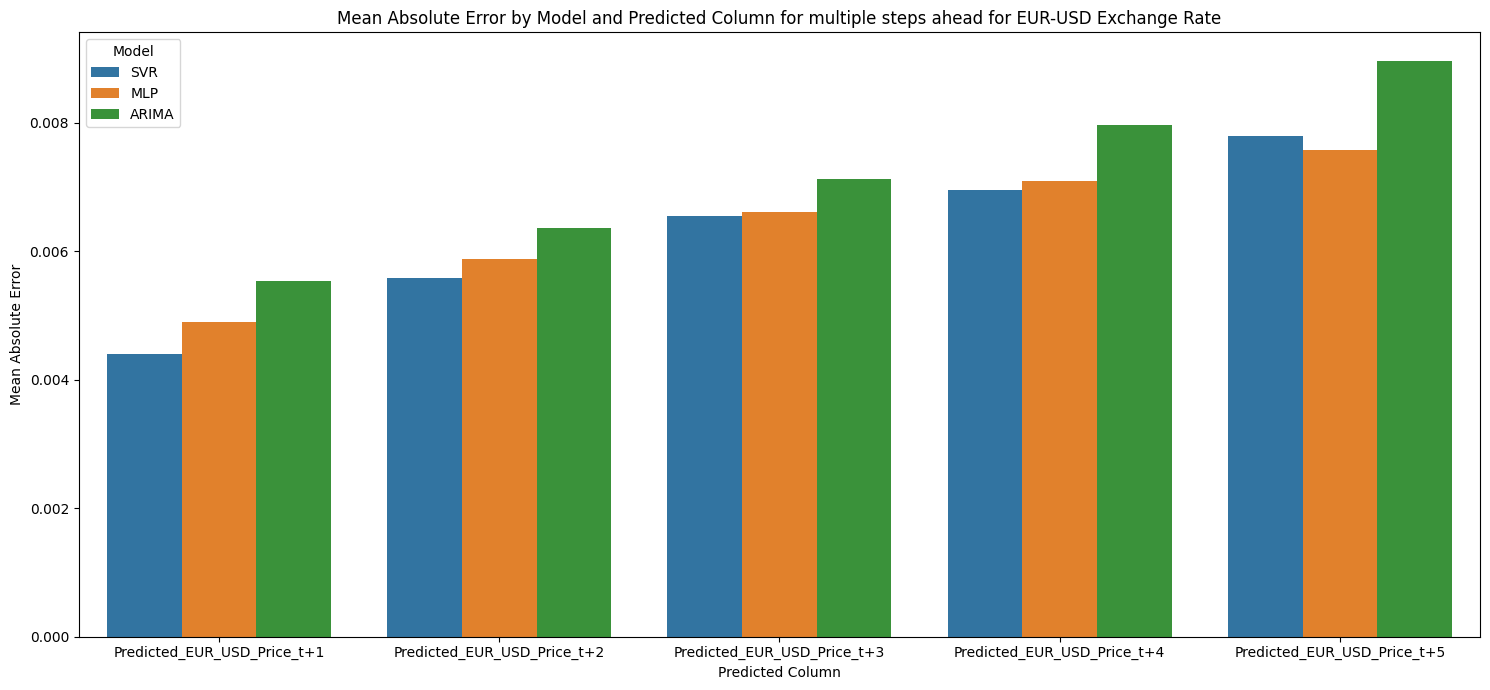

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the desired columns (Steps 1 to 5)
filtered_result = result[result['Predicted Column'].isin([f'Predicted_EUR_USD_Price_t+{i}' for i in range(1, 6)])]

plt.figure(figsize=(15,7))
sns.barplot(x="Predicted Column", y="Mean Absolute Error", hue="Model", data=filtered_result)
plt.title("Mean Absolute Error by Model and Predicted Column for multiple steps ahead for EUR-USD Exchange Rate")
plt.tight_layout()
plt.show()


#MAE by Model and Predicted Column for multiple steps ahead for Oil Price

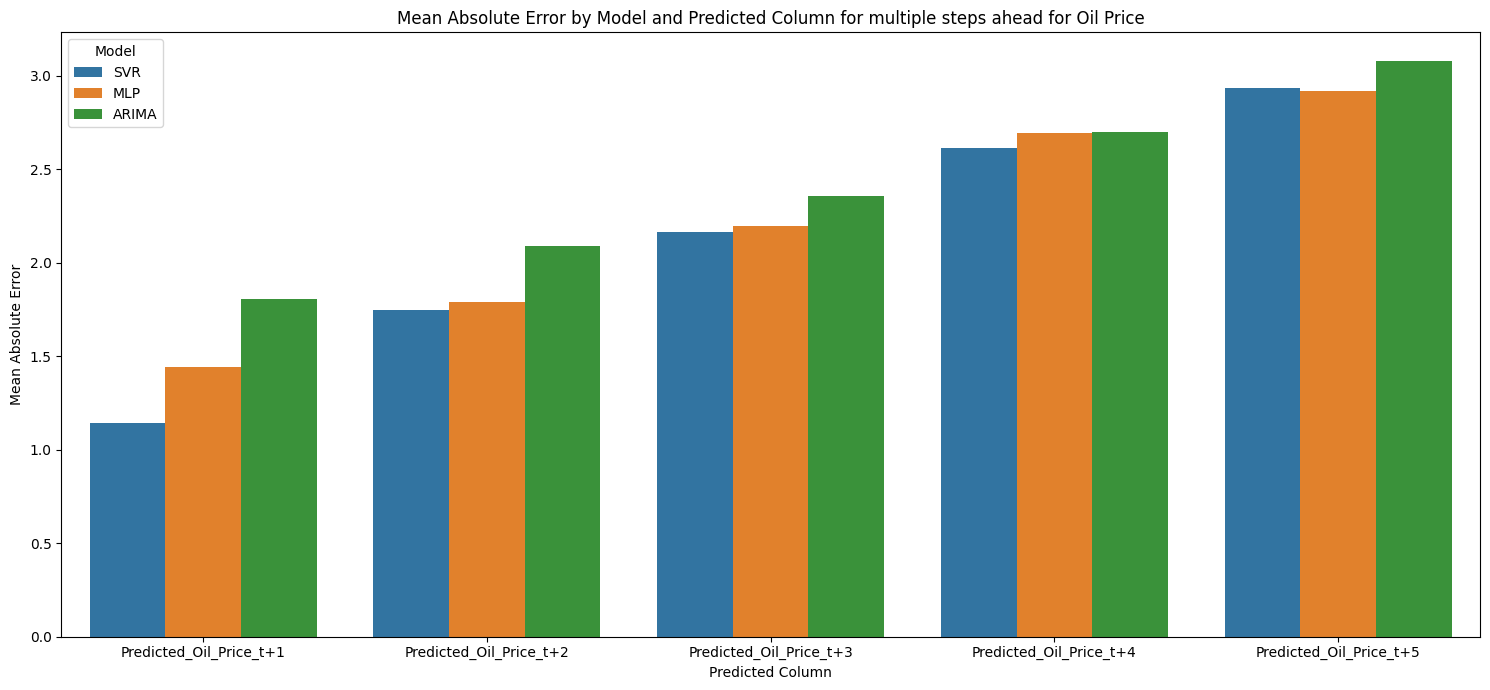

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the desired columns (Steps 1 to 5)
filtered_result = result[result['Predicted Column'].isin([f'Predicted_Oil_Price_t+{i}' for i in range(1, 6)])]

plt.figure(figsize=(15,7))
sns.barplot(x="Predicted Column", y="Mean Absolute Error", hue="Model", data=filtered_result)
plt.title("Mean Absolute Error by Model and Predicted Column for multiple steps ahead for Oil Price")
plt.tight_layout()
plt.show()


#MAE by Model and Predicted Column for multiple steps ahead for EUR-USD Exchange Rate & Oil Price

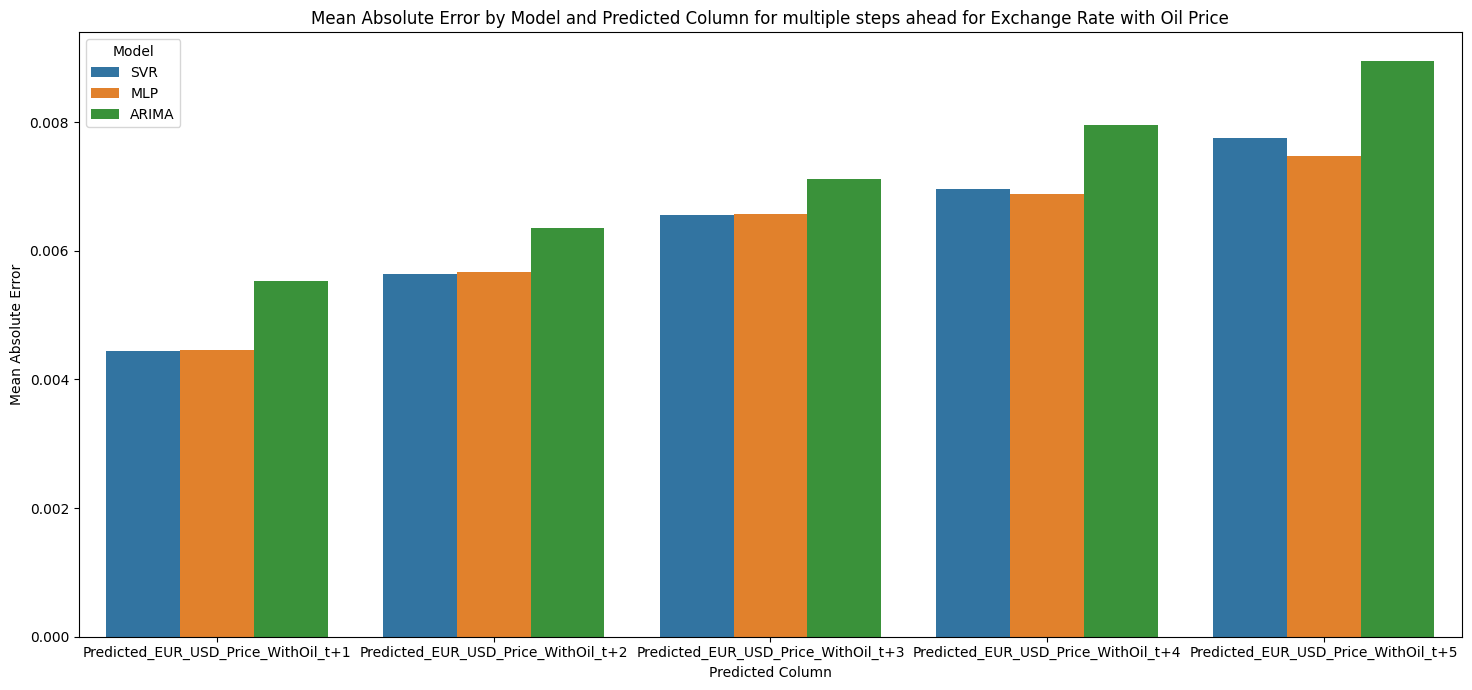

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the desired columns (Steps 1 to 5)
filtered_result = result[result['Predicted Column'].isin([f'Predicted_EUR_USD_Price_WithOil_t+{i}' for i in range(1, 6)])]

plt.figure(figsize=(15,7))
sns.barplot(x="Predicted Column", y="Mean Absolute Error", hue="Model", data=filtered_result)
plt.title("Mean Absolute Error by Model and Predicted Column for multiple steps ahead for Exchange Rate with Oil Price")
plt.tight_layout()
plt.show()


# Price Band Comaprison Started

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred, col1, col2, steps_ahead):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Original Column": col1, "Predicted Column": col2, "Steps Ahead": steps_ahead,
            "Mean Absolute Error": mae, "Mean Squared Error": mse,
            "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}


In [14]:
def calculate_price_band_metrics(data, actual_column, predicted_column, price_bands, steps_ahead=1):
    results = []

    for band in price_bands:
        band_name = f"{band[0]}-{band[1]}"

        # Filter data for the current price band
        mask = (data[actual_column] >= band[0]) & (data[actual_column] < band[1])
        band_data = data[mask]

        # Calculate metrics for the current price band
        metrics = calculate_metrics(band_data[actual_column], band_data[predicted_column], actual_column, predicted_column, steps_ahead)

        # Add band information and number of observations to metrics
        metrics['Price_Band'] = band_name
        metrics['Number of Observations'] = len(band_data)

        results.append(metrics)

    return pd.DataFrame(results)

# Prepare data for Price Band for Exchange Rate

In [15]:
price_bands = [(1.05, 1.07), (1.06, 1.07), (1.07, 1.08), (1.08, 1.09), (1.09, 1.10), (1.10, 1.11)]
SVR_Metrics_bands = calculate_price_band_metrics(df_SVR_Test, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_t+1', price_bands, 1)
SVR_Metrics_bands['Model'] = 'SVR'

MLP_Metrics_bands = calculate_price_band_metrics(df_MLP_Test, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_t+1', price_bands, 1)
MLP_Metrics_bands['Model'] = 'MLP'

ARIMA_Metrics_bands = calculate_price_band_metrics(df_ARIMA_Test, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_t+1', price_bands, 1)
ARIMA_Metrics_bands['Model'] = 'ARIMA'

CurMetrics_bands = pd.concat([SVR_Metrics_bands, MLP_Metrics_bands, ARIMA_Metrics_bands], ignore_index=True)

CurMetrics_bands[['Predicted Column','Mean Absolute Error','Price_Band','Model']].head(5)


,Predicted Column,Mean Absolute Error,Price_Band,Model
0,Predicted_EUR_USD_Price_t+1,0.005564,1.05-1.07,SVR
1,Predicted_EUR_USD_Price_t+1,0.005045,1.06-1.07,SVR
2,Predicted_EUR_USD_Price_t+1,0.003395,1.07-1.08,SVR
3,Predicted_EUR_USD_Price_t+1,0.003656,1.08-1.09,SVR
4,Predicted_EUR_USD_Price_t+1,0.004579,1.09-1.1,SVR


#MAE by Model and Price Band for USD-EUR Exchange rate for Step 1 Ahead

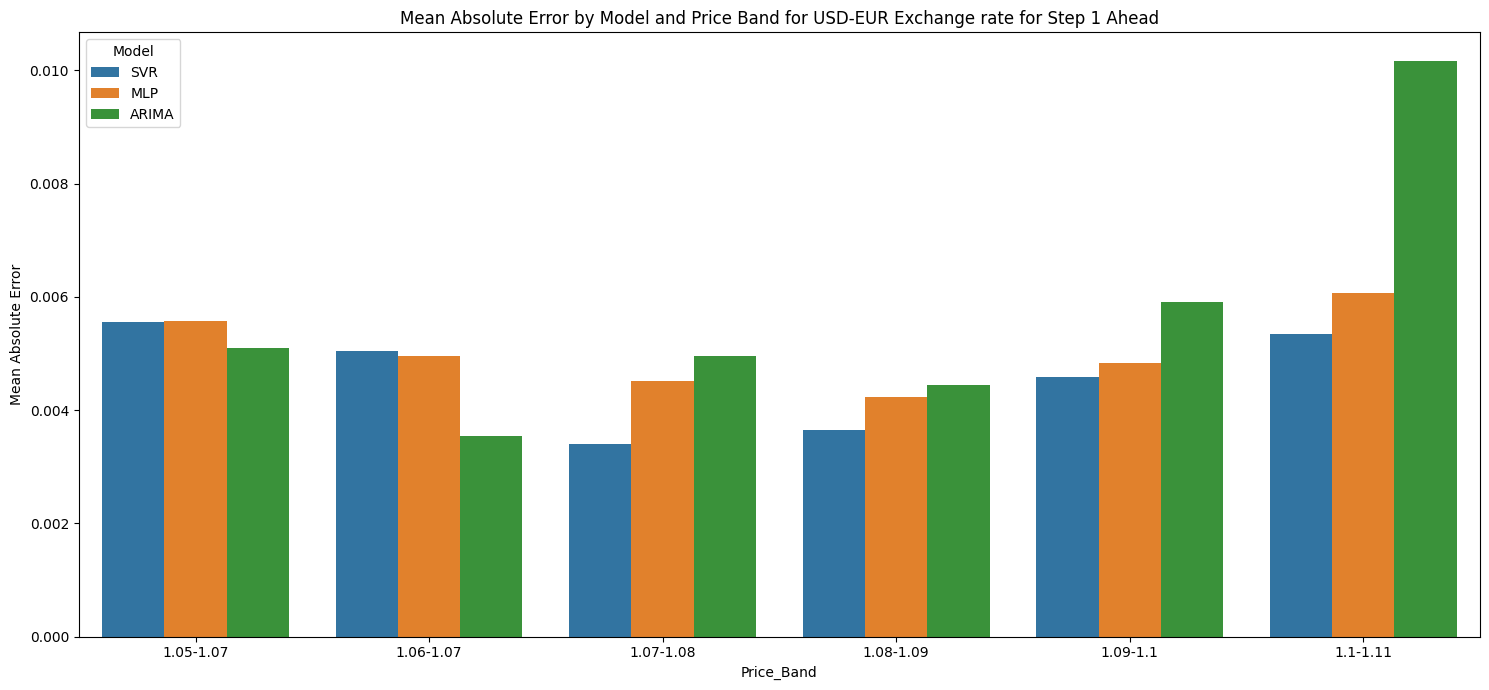

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

# Creating the barplot
sns.barplot(x="Price_Band", y="Mean Absolute Error", hue="Model", data=CurMetrics_bands)

plt.title("Mean Absolute Error by Model and Price Band for USD-EUR Exchange rate for Step 1 Ahead")
plt.tight_layout()
plt.show()


# Prepare data for Price Band for Oil Price

In [17]:
price_bands = [(70, 75), (75, 80), (80, 85), (85, 90)]
SVR_Metrics_bands = calculate_price_band_metrics(df_SVR_Test, 'Actual_Oil_Price_t+1', 'Predicted_Oil_Price_t+1', price_bands, 1)
SVR_Metrics_bands['Model'] = 'SVR'

MLP_Metrics_bands = calculate_price_band_metrics(df_MLP_Test, 'Actual_Oil_Price_t+1', 'Predicted_Oil_Price_t+1', price_bands, 1)
MLP_Metrics_bands['Model'] = 'MLP'

ARIMA_Metrics_bands = calculate_price_band_metrics(df_ARIMA_Test, 'Actual_Oil_Price_t+1', 'Predicted_Oil_Price_t+1', price_bands, 1)
ARIMA_Metrics_bands['Model'] = 'ARIMA'

OilMetrics_bands = pd.concat([SVR_Metrics_bands, MLP_Metrics_bands, ARIMA_Metrics_bands], ignore_index=True)

OilMetrics_bands[['Predicted Column','Mean Absolute Error','Price_Band','Model']].head(5)


,Predicted Column,Mean Absolute Error,Price_Band,Model
0,Predicted_Oil_Price_t+1,1.421153,70-75,SVR
1,Predicted_Oil_Price_t+1,1.177043,75-80,SVR
2,Predicted_Oil_Price_t+1,1.140339,80-85,SVR
3,Predicted_Oil_Price_t+1,0.527882,85-90,SVR
4,Predicted_Oil_Price_t+1,1.963426,70-75,MLP


# MAE by Model and Price Band for Oil Price for Step 1 Ahead

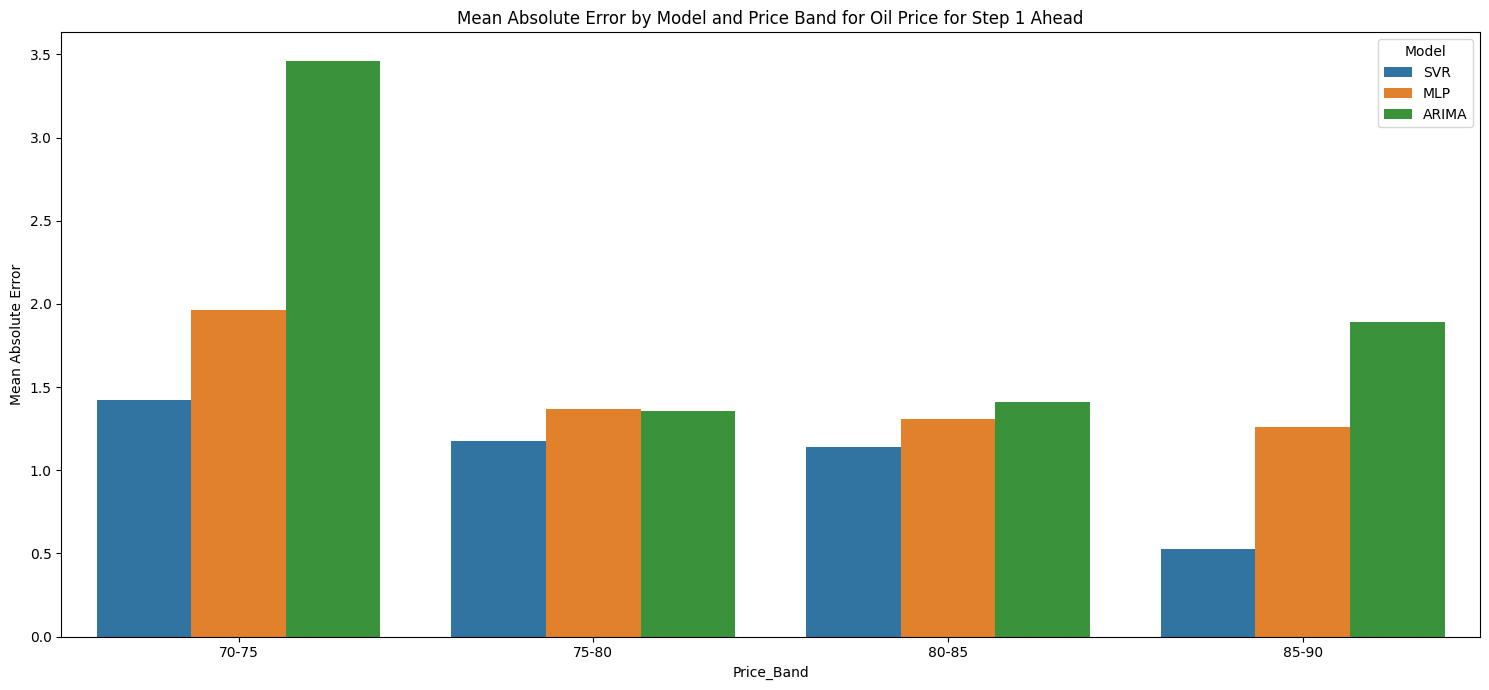

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

# Creating the barplot
sns.barplot(x="Price_Band", y="Mean Absolute Error", hue="Model", data=OilMetrics_bands)

plt.title("Mean Absolute Error by Model and Price Band for Oil Price for Step 1 Ahead")
plt.tight_layout()
plt.show()


#Prepare data for Price Band for Exchange Rate & Oil Price

In [19]:
price_bands = [(1.05, 1.07), (1.06, 1.07), (1.07, 1.08), (1.08, 1.09), (1.09, 1.10), (1.10, 1.11)]
SVR_Metrics_bands = calculate_price_band_metrics(df_SVR_Test, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_WithOil_t+1', price_bands, 1)
SVR_Metrics_bands['Model'] = 'SVR'

MLP_Metrics_bands = calculate_price_band_metrics(df_MLP_Test, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_WithOil_t+1', price_bands, 1)
MLP_Metrics_bands['Model'] = 'MLP'

ARIMA_Metrics_bands = calculate_price_band_metrics(df_ARIMA_Test, 'Actual_EUR_USD_Price_t+1', 'Predicted_EUR_USD_Price_WithOil_t+1', price_bands, 1)
ARIMA_Metrics_bands['Model'] = 'ARIMA'

CurOilMetrics_bands = pd.concat([SVR_Metrics_bands, MLP_Metrics_bands, ARIMA_Metrics_bands], ignore_index=True)




# MAE by Model and Price Band for Exchange Rate & Oil Price for Step 1 Ahead

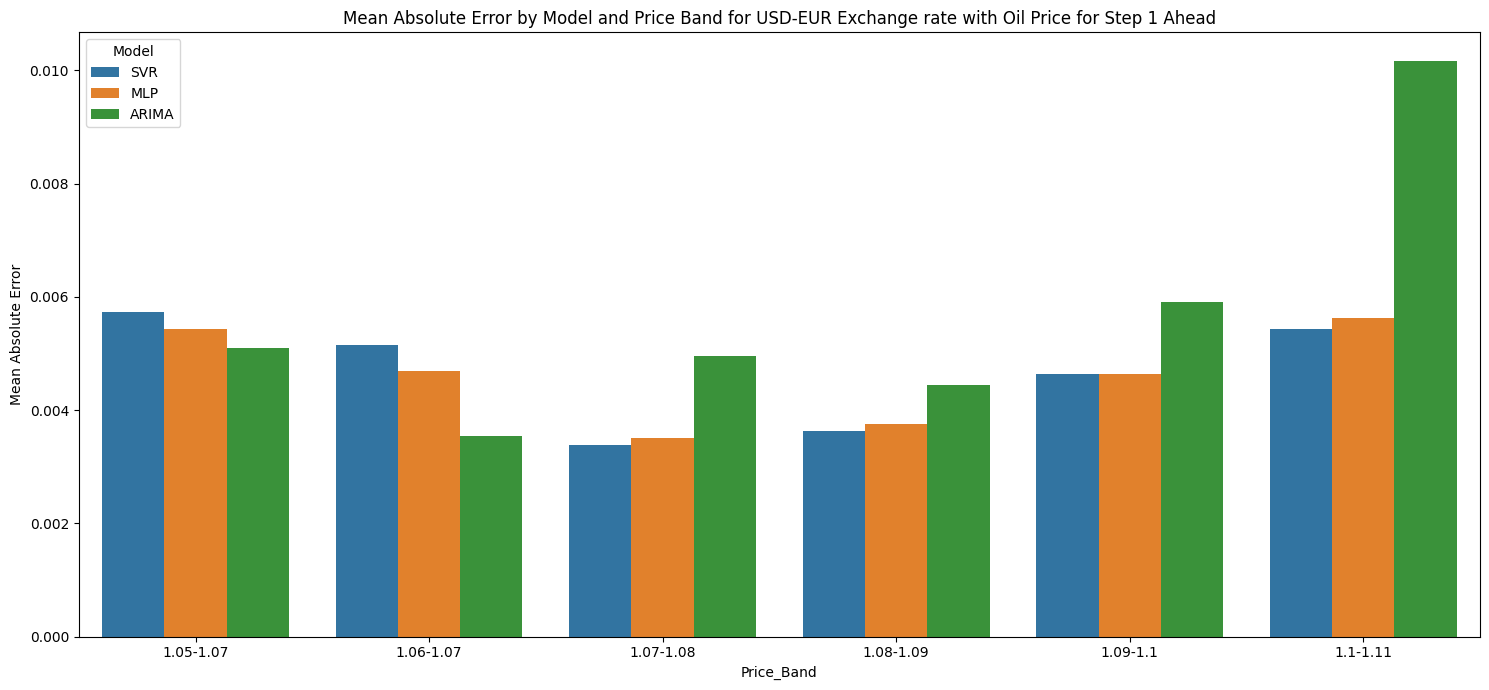

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

# Creating the barplot
sns.barplot(x="Price_Band", y="Mean Absolute Error", hue="Model", data=CurOilMetrics_bands)

plt.title("Mean Absolute Error by Model and Price Band for USD-EUR Exchange rate with Oil Price for Step 1 Ahead")
plt.tight_layout()
plt.show()
